# Анализ гипотезы увеличения выручки интернет-магазина.

Целью в данном проекте является приоритезировать выдвинутые гипотезы, которые смогут повысить выручку интернет-магазина, запустить A/B-тест для проверки гипотезы, проанализировать его результаты и сделать выводы на основе полученных данных.
В распоряжении имеем несколько наборов данных: гипотезы, датасет с информацией о заказах и группой A/B-теста, в которую попал заказ, а также датасет с участниками A/B-теста.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import warnings

## Содержание. 
1. [Приоритизация гипотез.](#paragraph1)
2. [Анализ A/B теста.](#paragraph2)
3. [График кумулятивной выручки по группам.](#paragraph3)
4. [График кумулятивного среднего чека по группам.](#paragraph4)
5. [График относительного изменения кумулятивного среднего чека группы B к группе A.](#paragraph5) 
6. [График кумулятивной конверсии по группам.](#paragraph6)
7. [График относительного изменения кумулятивной конверсии группы B к группе A.](#paragraph7)
8. [Точечный график количества заказов по пользователям.](#paragraph8)
9. [95-й и 99-й перцентили количества заказов на пользователя.](#paragraph9) 
10. [Точечный график стоимостей заказов.](#paragraph10) 
11. [95-й и 99-й перцентили стоимости заказов.](#paragraph11) 
12. [Статистическая значимость различий в конверсии между группами по «сырым» данным.](#paragraph12) 
13. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.](#paragraph13) 
14. [Статистическая значимость различий в конверсии между группами по «очищенным» данным.](#paragraph14) 
15. [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#paragraph15) 
16. [Общий вывод.](#paragraph16)

## Приоритизация гипотез. <a name="paragraph1"></a>

In [2]:
try:
    df = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except FileNotFoundError:
    df = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
pd.set_option("max_colwidth", 110) # установливаем максимальный размер колонки

In [4]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df['ice'] = (df['impact'] * df['confidence']) / df['efforts']

In [7]:
df['rice'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']

In [8]:
df[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [9]:
df[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Гипотеза №8 **Запустить акцию в день рождения** была самой приоритетной во фреймворке ICE, но в RICE ее приоритет зачительно снизился, потому что охват у данной гипотезы оценивается всего в 1 балл.

Вообще, если не учитывать акцию на День рождения, первая половина обоих рейтингов гипотез содержит одни и те же - это гипотезы 0, 2, 6, 7. Выходит оба фремворка дают похожие результаты и решающую роль играет охват.

Самая приоритетная гипотеза с рекордным показателем RICE в 112 баллов - это гипотеза 7 - **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**.

## Анализ A/B-теста <a name="paragraph2"></a>

Прочитаем данные.

In [10]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Приведем типы данных.

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

Проверим на дубликаты весь orders и отдельные столбцы.

In [13]:
print(orders.duplicated().sum())
print(orders['transactionId'].duplicated().sum())
print(orders['visitorId'].duplicated().sum())

0
0
166


Проверим, не попали ли дубликаты покупателей в разные группы.

In [14]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

In [15]:
c = list(set(ordersA['visitorId']) & set(ordersB['visitorId']))
len(c)

58

58 покупателей попали в разные группы, удалим из данных информацию о них. Мы не можем точно знать, в какой группе эти пользователи должны были оказаться, решать это самостоятельно некорректно. Мы могли бы изменить им всем группы на ту, в которой была совершена первая покупка, но нам неизвестна природа ошибки. Поэтому мы удалим данные. 

In [16]:
old_len = len(orders)
print(old_len)

1197


In [17]:
orders.drop(orders[orders['visitorId'].isin(c)].index, inplace=True)

In [18]:
new_len = len(orders)
print(old_len - new_len)

181


Удалили 181 строку.

### График кумулятивной выручки по группам. <a name="paragraph3"></a>



In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
                                         'date':'max', 
                                         'group':'max', 
                                         'revenue':'sum', 
                                         'transactionId': pd.Series.nunique,
                                         'visitorId': pd.Series.nunique}), axis=1).sort_values(by=['date', 'group'])

In [21]:
ordersAggregated

,date,group,revenue,transactionId,visitorId
55,2019-08-01,A,142779,23,19
66,2019-08-01,B,59758,17,17
175,2019-08-02,A,234381,42,36
173,2019-08-02,B,221801,40,39
291,2019-08-03,A,346854,66,60
...,...,...,...,...,...
533,2019-08-29,B,4746610,510,490
757,2019-08-30,A,3311413,460,437
690,2019-08-30,B,4955833,531,511
958,2019-08-31,A,3364656,468,445


In [22]:
vititorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date':'max',
    'group':'max',
    'visitors':'sum'
}), axis=1).sort_values(by=['date', 'group'])

In [23]:
cumulativeData = ordersAggregated.merge(vititorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData

,date,group,revenue,transactionId,visitorId,visitors
0,2019-08-01,A,142779,23,19,719
1,2019-08-01,B,59758,17,17,713
2,2019-08-02,A,234381,42,36,1338
3,2019-08-02,B,221801,40,39,1294
4,2019-08-03,A,346854,66,60,1845
...,...,...,...,...,...,...
57,2019-08-29,B,4746610,510,490,17708
58,2019-08-30,A,3311413,460,437,18037
59,2019-08-30,B,4955833,531,511,18198
60,2019-08-31,A,3364656,468,445,18736


In [24]:
cumulativeData.columns = ['date', 'group', 'revenue', 'orders', 'buyers', 'visitors']

In [25]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

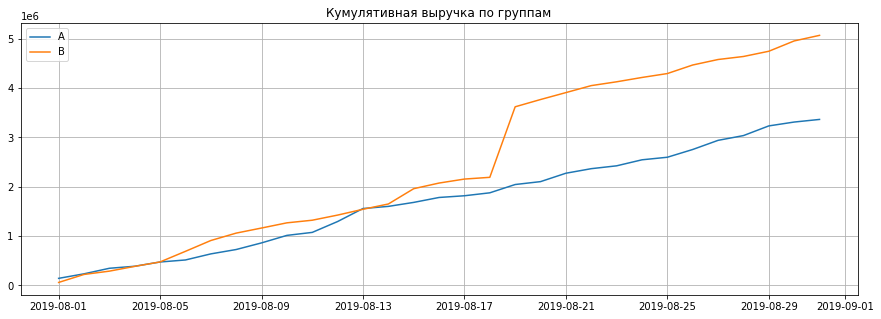

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.grid()
plt.title('Кумулятивная выручка по группам')
plt.legend()

График показывает ровный набор кумулятивной выручки обеих групп, но во второй трети августа в группе B выручка резко возрастает и сохраняет свой отрыв до конца теста. 

### График кумулятивного среднего чека по группам. Сделайте выводы и предположения. <a name="paragraph4"></a>

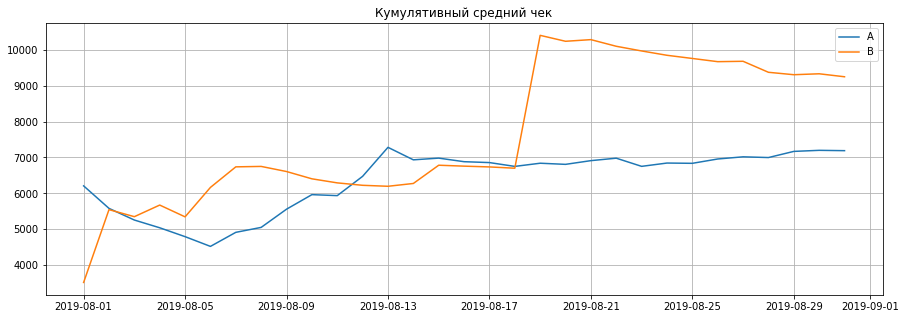

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.grid()
plt.title('Кумулятивный средний чек')
plt.legend()

Результаты очень противоречивые. 
Средний чек скачет группы A сначала падает, потом идет на подъем и наконец стабилизируется. 
Средний чек группы B имеет волнообразный график в первой половине месяцы, поом резкий скачок и постепенная стабилизация с уменьшением. Необходимо будет проверить данные на аномалии, резкий скачок мог возникнуть из-за очень крупной покупки.

### График относительного изменения кумулятивного среднего чека группы B к группе A. <a name="paragraph5"></a>

Соединим две таблицы групп так, чтобы результаты групп отображались в отдельных столбцах.

In [28]:
mergedcumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', suffixes=['_A', '_B'])
mergedcumulativeData

,date,group_A,revenue_A,orders_A,buyers_A,visitors_A,group_B,revenue_B,orders_B,buyers_B,visitors_B
0,2019-08-01,A,142779,23,19,719,B,59758,17,17,713
1,2019-08-02,A,234381,42,36,1338,B,221801,40,39,1294
2,2019-08-03,A,346854,66,60,1845,B,288850,54,53,1803
3,2019-08-04,A,388030,77,71,2562,B,385740,68,66,2573
4,2019-08-05,A,474413,99,92,3318,B,475648,89,87,3280
5,2019-08-06,A,515332,114,104,3985,B,690490,112,109,3935
6,2019-08-07,A,638580,130,120,4629,B,909654,135,132,4644
7,2019-08-08,A,727219,144,133,5239,B,1059795,157,154,5298
8,2019-08-09,A,861456,155,143,5856,B,1162961,176,173,5908
9,2019-08-10,A,1013731,170,158,6262,B,1268123,198,195,6277


Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека')

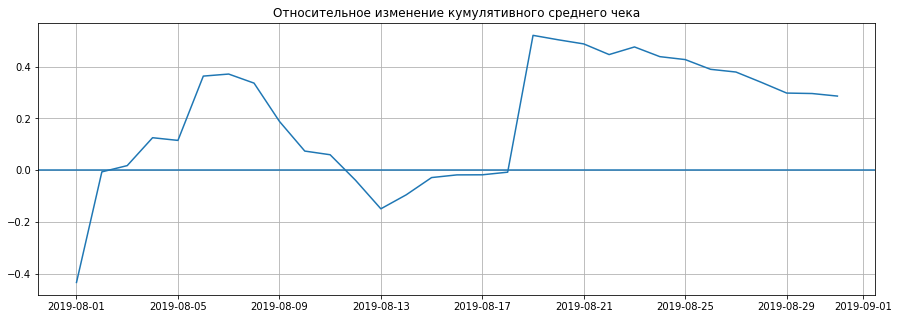

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(mergedcumulativeData['date'], (mergedcumulativeData['revenue_B']/mergedcumulativeData['orders_B']) /
         (mergedcumulativeData['revenue_A'] / mergedcumulativeData['orders_A'])-1)
plt.axhline(y=0)
plt.grid()
plt.title('Относительное изменение кумулятивного среднего чека')

График сильно скачет в показателях до 17 августа. Поначалу группа B вырывается вперед, потом просаживается, потом снова и резко показатель взлетает. Это говорит о вероятном наличии выбросов и аномалий.

### График кумулятивной конверсии по группам. <a name="paragraph6"></a>

In [30]:
mergedcumulativeData['conversion_A'] = mergedcumulativeData['orders_A'] / mergedcumulativeData['visitors_A']
mergedcumulativeData['conversion_B'] = mergedcumulativeData['orders_B'] / mergedcumulativeData['visitors_B']

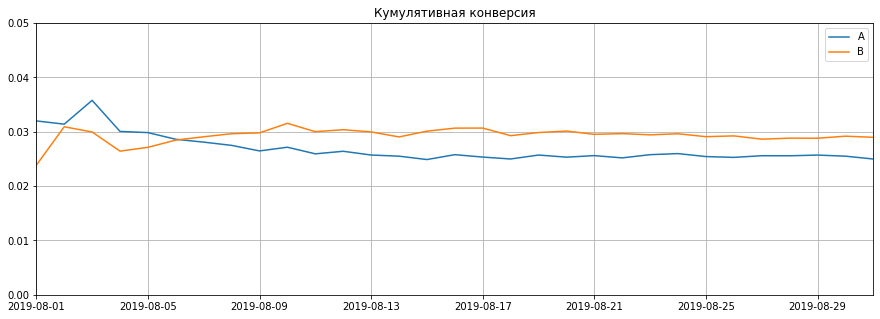

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(mergedcumulativeData['date'], mergedcumulativeData['conversion_A'], label='A')
plt.plot(mergedcumulativeData['date'], mergedcumulativeData['conversion_B'], label='B')
plt.title('Кумулятивная конверсия')
plt.grid()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.legend()

На графике конверсии Группа B поначалу отставала, но после вырвалась вперед и держала лидерство до конца теста.

Без установки масштаба, границы оси Y - это максимальное и минимальные значения кумулятивных конверсий групп, поэтому без масшаба кажется, что колебания конверсий сильны и они не установились вокруг средних значений.

В начале теста действительно наблюдаем сильные колебания в связи с малым количеством данных. Так группа А сначала лидирует, но потом ее показатели снижаются и стабилизируются вокруг значения в 2,5%. Группа B показывает результаты хуже до 6 августа, после конверсия улучшается, метрика стабилизируется у 3%, под конец теста конверсия падает немного ниже.


### График относительного изменения кумулятивной конверсии группы B к группе A <a name="paragraph7"></a>

(18109.0, 18139.0, -0.6, 0.6)

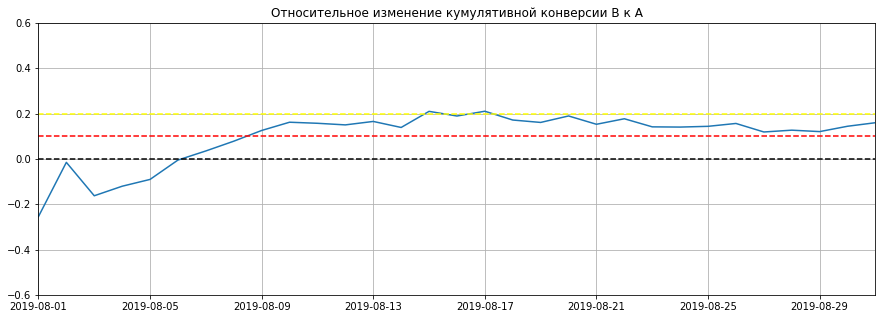

In [32]:
plt.figure(figsize=(15, 5))
plt.plot(mergedcumulativeData['date'], mergedcumulativeData['conversion_B'] / mergedcumulativeData['conversion_A'] - 1)
plt.title('Относительное изменение кумулятивной конверсии B к A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y=0.2, color='yellow', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.6, 0.6])

К середине теста куммулятивная конверсия группы B имела прирост в 20% относительно группы А, но потом показатель снизился до 10%. Высокие показаnели возникли на все той же проблемной дате 17 августа, где могут быть аномалии.

### Точечный график количества заказов по пользователям. <a name="paragraph8"></a>

In [33]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Сгуппируем датафрейм по пользователям и подсчитаем количество заказов.

In [34]:
orders_users = orders.groupby('visitorId').agg({'transactionId':pd.Series.nunique})

Text(0.5, 1.0, 'Распределение количества заказов по покупателям')

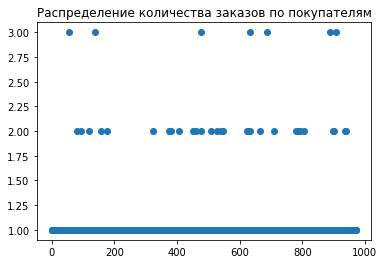

In [35]:
x_values = pd.Series(range(0,len(orders_users))) # задаем  значения х в размере датафрейма orders_users

plt.scatter(x_values, orders_users['transactionId'])
plt.title('Распределение количества заказов по покупателям')

Большая часть покупателей совершает от 1 до 3 заказов. 

### 95-й и 99-й перцентили количества заказов на пользователя. <a name="paragraph9"></a>

In [36]:
np.percentile(orders_users, [95, 99])

array([1., 2.])

99% пользователей делают максимум 2 покупки, остальные 1% совершают 3 покупки. 
**Отсечем тех, кто совершает 3 покупки.**



### Точечный график стоимостей заказов. <a name="paragraph10"></a>


Text(0.5, 1.0, 'Распределение стоимостей заказов')

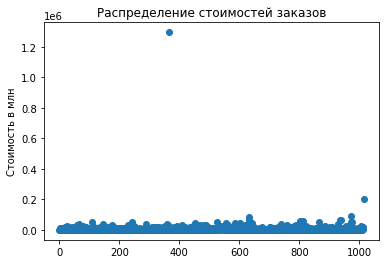

In [37]:
xx_values = pd.Series(range(0,len(orders['revenue']))) # задаем  значения х в размере датафрейма orders_users

plt.scatter(xx_values, orders['revenue'])
plt.ylabel('Стоимость в млн')
plt.title('Распределение стоимостей заказов')

Большинство заказов в сумме до 20 тыс. Есть один значительный выброс со стоимостью свыше миллиона.

### 95-й и 99-й перцентили стоимости заказов. <a name="paragraph11"></a>

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

95% заказов со стоимостью не более 28 тыс., 99% до 59 тыс. **Отсечем 1 процент максимальных заказов.**

### Статистическая значимость различий в конверсии между группами по «сырым» данным. <a name="paragraph12"></a>



Создадим финальный датафрейм со всеми данными по группам. Для этого присоединим к кумулятивному датафрему mergedcumulativeData данные по посетителям и заказам в день по группам.

In [39]:
visitorsPerDateA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsPerDateB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsPerDateA.columns = ['date', 'daily_visitors_A']
visitorsPerDateB.columns = ['date', 'daily_visitors_B']

In [40]:
ordersPerDateA = orders[orders['group'] == 'A'].groupby('date').agg({'transactionId': pd.Series.nunique, 'revenue':'max'}).reset_index()
ordersPerDateB = orders[orders['group'] == 'B'].groupby('date').agg({'transactionId': pd.Series.nunique, 'revenue':'max'}).reset_index()
ordersPerDateA.columns = ['date', 'daily_orders_A', 'daily_rev_A']
ordersPerDateB.columns = ['date', 'daily_orders_B', 'daily_rev_A']

In [41]:
final_data = (mergedcumulativeData.merge(visitorsPerDateA, left_on='date', right_on='date', how='left')
              .merge(visitorsPerDateB, left_on='date', right_on='date', how='left')
              .merge(ordersPerDateA, left_on='date', right_on='date', how='left')
              .merge(ordersPerDateB, left_on='date', right_on='date', how='left')
             )

In [42]:
final_data.head()

,date,group_A,revenue_A,orders_A,buyers_A,visitors_A,group_B,revenue_B,orders_B,buyers_B,visitors_B,conversion_A,conversion_B,daily_visitors_A,daily_visitors_B,daily_orders_A,daily_rev_A_x,daily_orders_B,daily_rev_A_y
0,2019-08-01,A,142779,23,19,719,B,59758,17,17,713,0.031989,0.023843,719,713,23,29499,17,9980
1,2019-08-02,A,234381,42,36,1338,B,221801,40,39,1294,0.031390,0.030912,619,581,19,17422,23,38160
2,2019-08-03,A,346854,66,60,1845,B,288850,54,53,1803,0.035772,0.029950,507,509,24,20990,14,18464
3,2019-08-04,A,388030,77,71,2562,B,385740,68,66,2573,0.030055,0.026428,717,770,11,13990,14,31350
4,2019-08-05,A,474413,99,92,3318,B,475648,89,87,3280,0.029837,0.027134,756,707,22,24744,21,28350


Создадим списки: покупатель + кол-во заказов по группам.

In [43]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 

Прицепим также посетителей, чей визит не превратился в заказ, т.е. в столбце orders будет 0. 

Конверсия - отношение суммы заказов к количеству посетителей. Рассчитаем с помощью метода mean.  

In [44]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(final_data['daily_visitors_A'].sum() 
                                                                           - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(final_data['daily_visitors_B'].sum() 
                                                                           - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Итого sampleA и sampleB - наборы данных с количеством посетителей и совершенных ими заказов.

### Выдвинем гипотезы: ####
**H0** = между группами нет статистически значимого различия в конверсии

**H1** = между группами есть статистически значимое различие в конверсии

Задим уровень статистической значимости **альфа 0,05**

In [45]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Наше значение меньше уровня стат.значимости, значит нулевую гипотезу об отсутсивии стат. значимого различия между группами по их конверии **мы отвергаем**.
Статистическая значимость различия есть, по крайней мере по сырым данным. Относительное различие конверсий группы B к А почти 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. <a name="paragraph13"></a>

### Выдвинем гипотезы: ####
**H0** = между группами нет статистически значимого различия в среднем чеке

**H1** = между группами есть статистически значимое различие в среднем чеке

Задим уровень статистической значимости **альфа 0,05**

In [46]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


А здесь статистически значимого различия в средних чеках групп нет, наше значение p-value больше alpha, поэтому мы не можем отвергнуть нулевую гипотезу. 

Хотя относительное различие между группами почти 28% в пользу группы B.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. <a name="paragraph14"></a>



Отсечем заказы стоимостью выше 58 тыс и пользователей с покупками больше 2х.

In [47]:
orders_users = orders_users.reset_index()

In [48]:
abnormalUsers = pd.concat([orders_users[orders_users['transactionId'] > 2]['visitorId'], 
                           orders[orders['revenue'] > 58000]['visitorId']], axis=0).drop_duplicates()

In [49]:
abnormalUsers.shape

(16,)

24 аномальных покупателя.

Считаем стат значимость

In [50]:
clean_sampleA = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                final_data['daily_visitors_A'].sum() - len(ordersByUsersA['orders'])
            ), 
            name='orders')],axis=0)

In [51]:
clean_sampleB = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                final_data['daily_visitors_B'].sum() - len(ordersByUsersB['orders'])
            ), 
            name='orders')],axis=0) 

In [52]:
print("{0:.3f}".format(st.mannwhitneyu(clean_sampleA, clean_sampleB)[1]))

print("{0:.3f}".format(clean_sampleB.mean() / clean_sampleA.mean() - 1))

0.007
0.189


Очистка данных от пользователей с большим количеством заказов почти не повлияла на результаты теста. Стат значимость различий все еще есть. Нулевую гипотезу об отсутсвии разницы в конверсиях мы отвергаем.

Конверсия группы B лучше относительно конверсии группы A на 15%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. <a name="paragraph15"></a>

In [53]:
clean_orders = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [54]:
print('{0:.3f}'.format(st.mannwhitneyu(clean_orders[clean_orders['group']=='A']['revenue'], 
                                       clean_orders[clean_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(clean_orders[clean_orders['group']=='B']['revenue'].mean()/clean_orders[clean_orders['group']=='A']['revenue'].mean()-1)) 

0.788
-0.032


Статистической значимости различия средних чеков не возникло, нулевую гипотезу об отсутвии разницы в средних чеках отвернуть не можем, но относительная разница сильно изменилась. До этого средний чек группы B был лучше на 28%, но после очистки данных он стал хуже на 3%. Выходит, все преимущество ему принес тот крупный миллионный выброс.

## Вывод. <a name="paragraph16"></a>

Анализ результатов A/B теста показал, что группа B демострирует лучше результаты по конверсии, чем контрольная группа А, между ними есть статистически значимое различие как по сырым, так и по очищенным данным.

В тоже время между группами нет статистически значимого различия по размеру среднего чека. Очистка данных показала, что у группы B средний чек снизился относительно контрольной группы A на 2%. 

Это говорит о том, что в связи с изменениями, внесененными по нашей гипотезе, в интернет магазине больше посетителей стали совершать покупки, но траты стали мельче, и средний чек не увеличился. Значит цель не была достигнула, нужно остановить тест, зафиксировать провал и перейти к анализу причин провала. 